# Discrete Anomaly Detection

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns
%matplotlib inline

from acquire import get_log_data
from prepare import prep_log_data, ip_statistics, ip_status_proabilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_log_data()
df = prep_log_data(df)

In [3]:
df.head()

,ip,request_method,status,size,destination,request_agent,size_mb,ip_count,ip_probability
timestamp,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,0.488753,11999,0.85842
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,0.003396,11999,0.85842
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,0.486472,11999,0.85842
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,0.486377,11999,0.85842
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,0.488246,11999,0.85842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13978 entries, 2019-04-16 19:34:42 to 2019-04-21 10:02:41
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ip              13978 non-null  object 
 1   request_method  13978 non-null  object 
 2   status          13978 non-null  int64  
 3   size            13978 non-null  int64  
 4   destination     25 non-null     object 
 5   request_agent   13978 non-null  object 
 6   size_mb         13978 non-null  float64
 7   ip_count        13978 non-null  int64  
 8   ip_probability  13978 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.1+ MB


In [5]:
ip_statistics(df)

,ip,ip_count,ip_probability
0,97.105.19.58,11999,0.858420
1,173.173.113.51,1059,0.075762
2,72.181.113.170,613,0.043855
3,72.181.105.81,246,0.017599
4,24.26.242.9,21,0.001502
5,68.201.219.223,21,0.001502
6,35.175.171.137,2,0.000143
7,52.87.230.102,2,0.000143
8,70.121.214.34,2,0.000143
9,52.91.30.150,1,0.000072


## 1. Use basic probability to identify anomalous request methods. You will want to make sure the text is normalized in order to reduce the noise.

In [6]:
train = df.loc['2019-04-16 19:34:42':'2019-04-17 12:55:14'][['ip','request_method','status','size','destination','request_agent','size_mb']]

In [7]:
train = train.fillna(0)

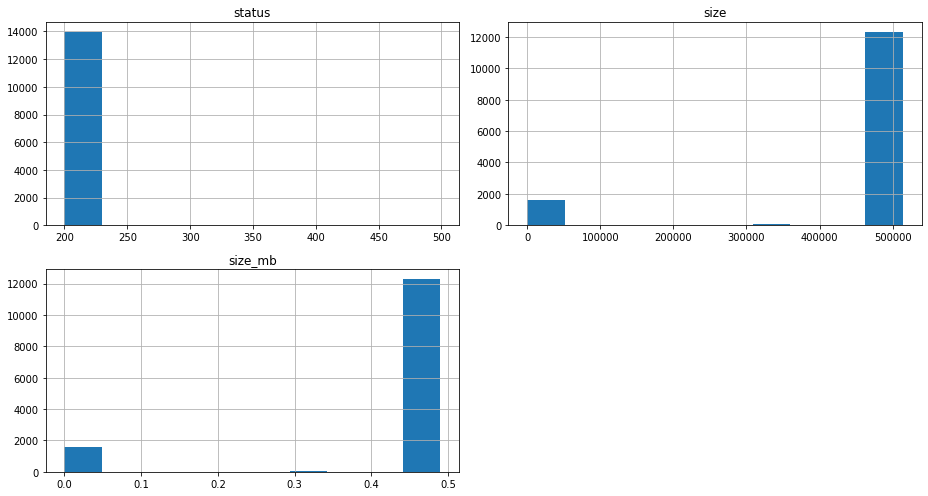

In [8]:
train.hist(figsize=(13, 7))
plt.tight_layout();

In [9]:
ip_statistics(train)

,ip,ip_count,ip_probability
0,97.105.19.58,11998,0.858595
1,173.173.113.51,1059,0.075784
2,72.181.113.170,613,0.043867
3,72.181.105.81,246,0.017604
4,24.26.242.9,21,0.001503
5,68.201.219.223,21,0.001503
6,35.175.171.137,2,0.000143
7,52.87.230.102,2,0.000143
8,70.121.214.34,2,0.000143
9,52.91.30.150,1,0.000072


In [15]:
ip_status_proabilities(train)

,ip,status,ip_status_counts,status_probability
0,173.173.113.51,200,1059,1.000000
1,24.26.242.9,200,21,1.000000
2,3.88.129.158,200,1,1.000000
3,3.92.201.136,200,1,1.000000
4,34.207.64.242,200,1,1.000000
5,34.229.70.250,200,1,1.000000
6,35.174.209.2,200,1,1.000000
7,35.175.171.137,200,2,1.000000
8,45.23.250.16,200,1,1.000000
9,52.87.230.102,200,2,1.000000
